# Visualization with hierarchical clustering and t-SNE

---

In this notebook, we will learn about 2 unsupervised learning techniques for data visualization, hierarchical clustering and t-SNE.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

## Visualization hierarchies

![](assets/images/hier.png)

This is a hierarchical clustering of groups inside larger groups and so on forming a hierarchy. Let's consider a dataset about Eurovision scorings. Countries gave scores to songs performed at the Eurovision 2016. It's ranged in 2D array of scores where its rows are the countries and its columns are the songs.

The results of applying hierarchical clustering to this data can be visualized in a **dendrogram**
![](assets/images/eurovision.png)

The dendogram above groups the countries into larger and larger clusters. And many of these clusters are recognizable as they are close to each other or have simlarities in their cultures or share the same language.


Hierarchical clustering are done in multiple steps:

* Every country begins in its own separate cluster
* At each level, the 2 closest clusters are merged into a new cluster
* Continue until all countries are in a single cluster

This is the most common type of hierarchical clustering called **agglomerative hierarchical clustering**.

We can perform hierarchical clustering using `scipy` package using the function `linkage` to perform the clustering and `dendrogram` to visualize it.

In [4]:
eurovision_df = pd.read_csv("assets/data/eurovision.csv")
eurovision_df.head()

,From country,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
0,Albania,2.0,12.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,4.0,0.0,5.0,7.0,0.0,0.0,3.0,0.0,6.0,0.0
1,Armenia,NaN,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,5.0,1.0,12.0,0.0,0.0,2.0,0.0,10.0,0.0
2,Australia,0.0,NaN,3.0,0.0,12.0,10.0,0.0,0.0,0.0,...,1.0,6.0,0.0,5.0,0.0,2.0,0.0,0.0,8.0,4.0
3,Austria,0.0,3.0,NaN,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,12.0,8.0,4.0,0.0,7.0,6.0,10.0,0.0
4,Azerbaijan,0.0,2.0,0.0,NaN,0.0,8.0,0.0,0.0,0.0,...,0.0,5.0,3.0,12.0,0.0,0.0,0.0,0.0,10.0,0.0


In [7]:
country_names = list(eurovision_df["From country"])
samples = eurovision_df.drop(columns=["From country"]).fillna(value=0).values

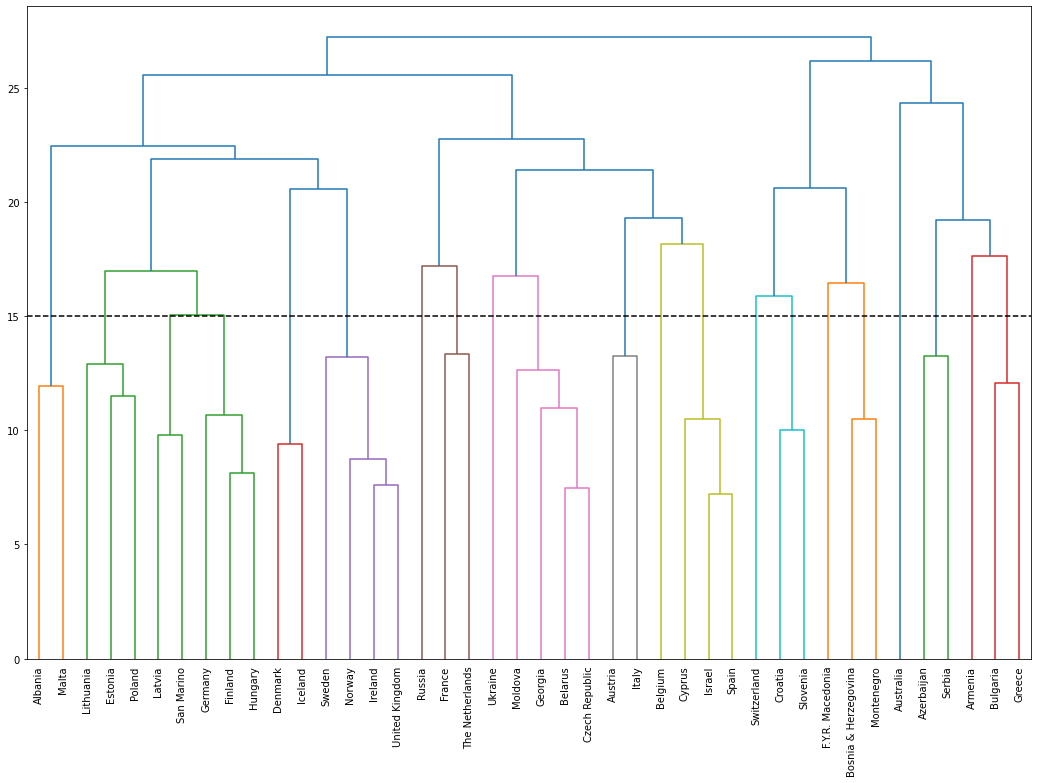

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(samples, method="complete")

plt.figure(figsize=(18, 12))
dendrogram(
    mergings,
    labels = country_names,
    leaf_font_size=10
);

plt.axhline(y=15, linestyle="--", color = "black")

## Cluster labels in hierarchical clustering

From the mergings in the dendrogram, we can recover the cluster labels at any intermediate stage. 

![](assets/images/intermediate.png)


For the above segment, we have at level (height) 15, each vertical line represents a separate cluster. Here we have 3 lines:

* Bulgaria, Cypruus, and Greece are merged at that height into one cluster.
* Armenia is in its own cluster.
* Russoa and Moldova are merged in the third cluster.

>But what does the height represent?

The height represents the distance between the clusters just before merging. For example:

* The distance between the cluster of Greece and the cluster of Cyprus was about 6 before merging.
* The distance between the new cluster merging Greece and Cyprus and the cluster of Bulgaria was about 12 before merging.

So the height on dendrogram specifies maximum distance between merging clusters. That distance is specified by a **linkage method** which is defined by `method` argument in the `linkage` function. 

* In *complete linkage*, the one we used above, the distance between the clusters is the max distance between their samples which is the distance between the furtherest points.
* In *single linkage*, the distance between the clusters is the distance between the closest clusters.

Different methods give different hierarchical clusterings.

We can extract the labels at any height using the `fcluster()` function which returns a `numpy` array of the labels.

In [18]:
from scipy.cluster.hierarchy import fcluster

labels = fcluster(mergings, 15, criterion="distance")
labels

array([ 1, 20, 21, 11, 18,  9, 13, 16, 19, 14, 12,  9,  5,  2, 17,  4,  7,
        9,  4, 19,  4,  5,  6, 12, 11,  3,  2,  1,  9, 16,  6,  2,  8,  3,
       18, 14, 12,  6, 15,  7, 10,  6], dtype=int32)

And now, we can construct a dataframe combining the labels and countries.

In [20]:
hier_clustering_countries = pd.DataFrame({"labels": labels, "country": country_names}).sort_values(by="labels")
hier_clustering_countries

,labels,country
0,1,Albania
27,1,Malta
31,2,Poland
26,2,Lithuania
13,2,Estonia
33,3,San Marino
25,3,Latvia
18,4,Germany
15,4,Finland
20,4,Hungary


## t-SNE for 2-dimensional maps

t-SNE maps the high-dimensional data to a 2D (3D) space to be visualize it and it approxiametely preserves the nearness of samples.

We can see the t-SNE on the iris dataset. The dataset is 4-dimensional. t-SNE can map it to 2d space without knowing that were even different species. This will be the result,

![](assets/images/tsne.png)

To use t-SNE, we can use `TSNE` from `sklearn.manifold`. 

<AxesSubplot:>

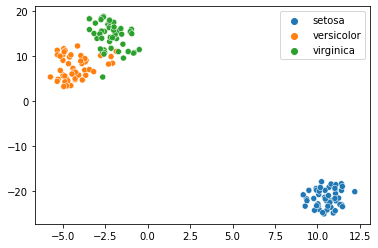

In [36]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

iris = load_iris()

model = TSNE(learning_rate=100)
mapped_data = model.fit_transform(iris.data)

xs = mapped_data[:, 0]
ys = mapped_data[:, 1]

sns.scatterplot(
    x = xs,
    y = ys,
    hue = [iris.target_names[species] for species in iris.target]
)



The learning rate specified when instanting the `TSNE` object. It's not constant (or standard value) for all datasets. We must look at different values for learning rate until we get better results. But it's safe to say is between 50 and 200.

***NOTE:*** Every time you generate a t-SNE mapped plot. It will be different each time. However, the relative position with respect to another samples is nearly the same each time.

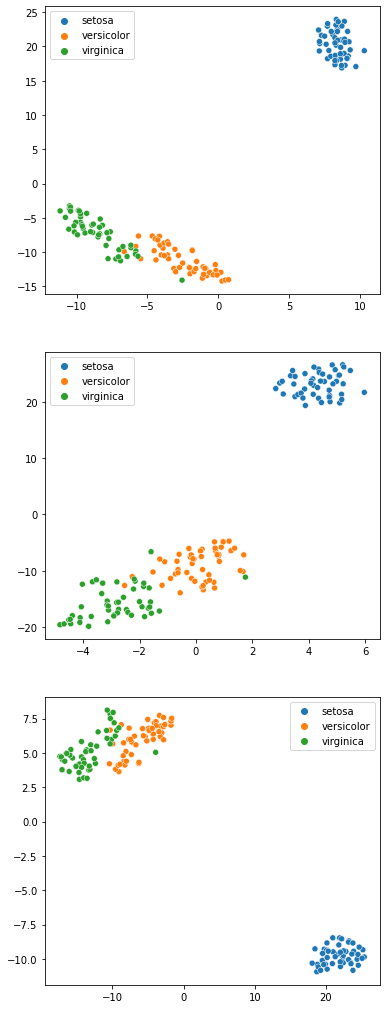

In [39]:
fig, axes = plt.subplots(3, 1, figsize=[6, 18])

for ax in axes:
    model = TSNE(learning_rate=100)
    mapped_data = model.fit_transform(iris.data)

    xs = mapped_data[:, 0]
    ys = mapped_data[:, 1]
    
    plt.sca(ax)
    sns.scatterplot(
        x = xs,
        y = ys,
        hue = [iris.target_names[species] for species in iris.target]
    )


**[TODO]** Add explaination of t-SNE. [link1](https://www.youtube.com/watch?v=NEaUSP4YerM), [link2](https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a)